In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [56]:
dataset=pd.read_csv("crimes.csv",sep=';')
dataset.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [57]:
dataset.describe

<bound method NDFrame.describe of               Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0           Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1            Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2           Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3          Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4        California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5
5          Colorado     6.3  42.0  170.7    292.9  1935.2  3903.2       477.1
6       Connecticut     4.2  16.8  129.5    131.8  1346.0  2620.7       593.2
7          Delaware     6.0  24.9  157.0    194.2  1682.6  3678.4       467.0
8           Florida    10.2  39.6  187.9    449.1  1859.9  3840.5       351.4
9           Georgia    11.7  31.1  140.5    256.5  1351.1  2170.2       297.9
10           Hawaii     7.2  25.5  128.0     64.1  1911.5  3920.4       489.4
11            Idaho     5.5  1

In [58]:
dataset.shape


(50, 8)

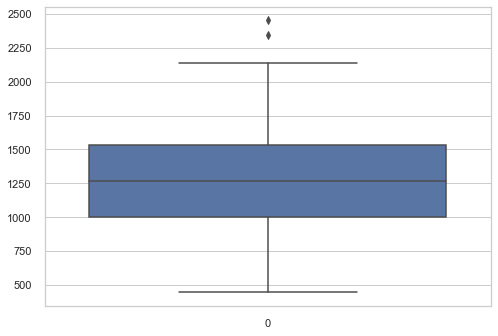

In [59]:
sns.set(style="whitegrid")
sns.boxplot(data=dataset["Viol"],orient='v')
plt.show()

In [60]:
dataset[dataset['Viol']>2300]

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
27,Nevada,15.8,49.1,323.1,355.0,2453.1,4212.6,559.2


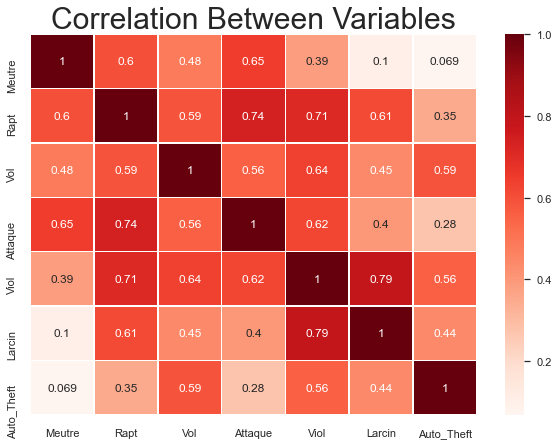

In [61]:
plt.figure(figsize=(10, 7))
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap="Reds")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

In [62]:
x=dataset.iloc[:,1:8].values
labels=dataset.iloc[:,0].values
print(labels)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New-Hampshire' 'New-Jersey' 'New-Mexico' 'New-York'
 'North-Carolina ' 'North-Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode-Island' 'South-Carolina ' 'South-Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West-Virginia' 'Wisconsin' 'Wyoming']


# PCA Component Analysis & standarisation

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_scaler=scaler.fit_transform(x)
pca=PCA(n_components=None)
x_pca=pca.fit_transform(x_scaler)
print(pca.explained_variance_ratio_)

[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]


In [64]:
sum(pca.explained_variance_ratio_[:2])

0.7648116201908643

In [65]:
x_pca.shape

(50, 7)

In [66]:
x_pca[0,:]

array([-0.05038664, -2.11738312,  0.50673755,  0.25353338,  0.50354699,
       -0.43802073, -0.11927372])

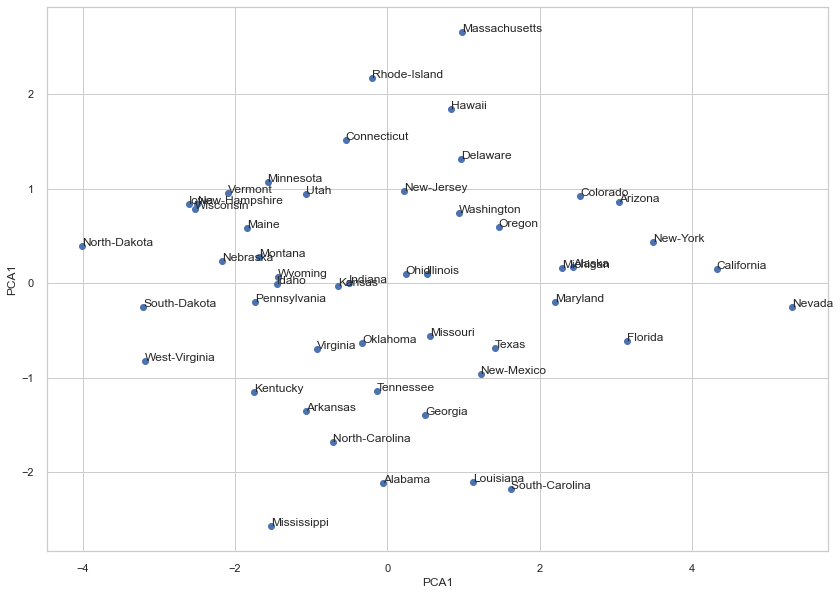

In [67]:
plt.figure(figsize=(14, 10))
plt.scatter(x_pca[:,0],x_pca[:,1])
for label,x1,y in zip(labels,x_pca[:,0],x_pca[:,1]):
    plt.annotate(label,xy=[x1,y])

plt.xlabel('PCA1')
plt.ylabel('PCA1')
plt.show()

In [68]:
dataset[dataset['Etat ']=='Mississippi']



,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
23,Mississippi,14.3,19.6,65.7,189.1,915.6,1239.9,144.4


In [69]:
dataset[dataset['Etat ']=='Massachusetts']

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
20,Massachusetts,3.1,20.8,169.1,231.6,1532.2,2311.3,1140.1


# KMeans sur les variables brutes

In [70]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)
wcss

[37698133.220400006,
 16497439.003786767,
 9975258.82333333,
 7196005.88323985,
 5908454.66496825,
 4944577.506666667,
 4193150.4670317457,
 3656213.387420635,
 3180597.555269841,
 2916679.8897619043]

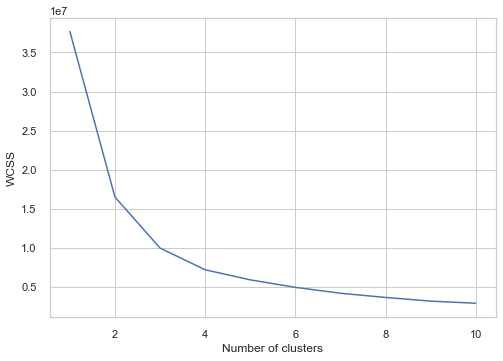

In [71]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

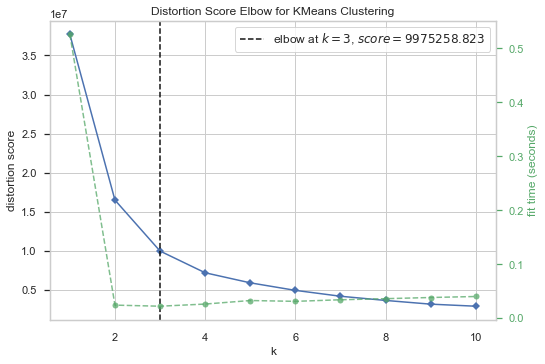

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(x)
visualizer.show() 

# KMeans sur les variables aprés scaler

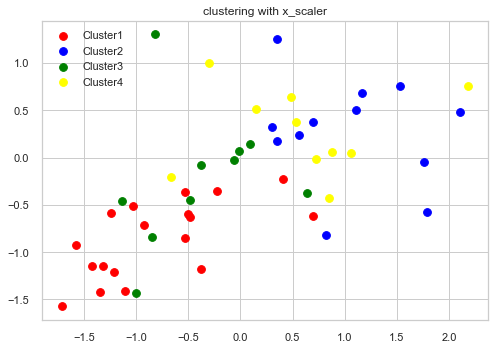

In [73]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(x_scaler) 
y_kmeans_scaler=kmeans.labels_
y_kmeans_scaler
plt.scatter(x_scaler[y_kmeans_scaler == 0, 0], x_scaler[y_kmeans_scaler == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x_scaler[y_kmeans_scaler == 1, 0], x_scaler[y_kmeans_scaler == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x_scaler[y_kmeans_scaler == 2, 0], x_scaler[y_kmeans_scaler == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x_scaler[y_kmeans_scaler == 3, 0], x_scaler[y_kmeans_scaler == 2, 2], s = 60, c = 'yellow', label = 'Cluster4')

plt.title('clustering with x_scaler')
plt.legend()
plt.show()


# KMeans sur les variables aprés PCA

In [74]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_pca) 
    wcss.append(kmeans.inertia_)
wcss

[349.9999999999997,
 211.29399221464914,
 170.2365189495353,
 138.0245848650298,
 119.50597356767314,
 107.31316036781229,
 98.43058781541967,
 87.9540933602516,
 78.8625580526801,
 74.8503982497852]

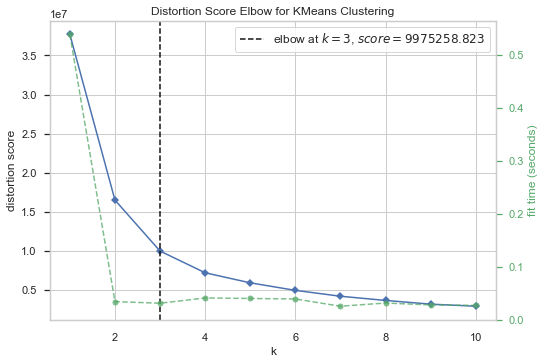

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(x)
visualizer.show() 

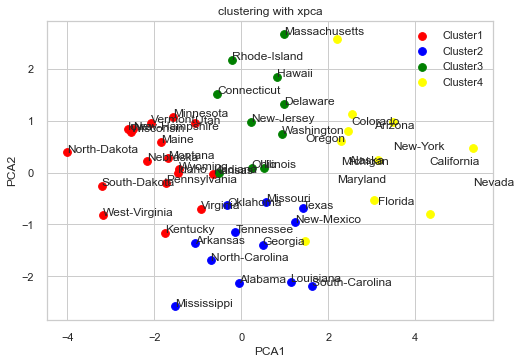

In [76]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(x_pca) 
y_kmeans_pca=kmeans.labels_
y_kmeans_pca
plt.scatter(x_pca[y_kmeans_pca == 0, 0], x_pca[y_kmeans_pca == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x_pca[y_kmeans_pca == 1, 0], x_pca[y_kmeans_pca == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x_pca[y_kmeans_pca == 2, 0], x_pca[y_kmeans_pca == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x_pca[y_kmeans_pca == 3, 0], x_pca[y_kmeans_pca == 2, 2], s = 60, c = 'yellow', label = 'Cluster4')
for label,x1,y in zip(labels,x_pca[:,0],x_pca[:,1]):
    plt.annotate(label,xy=[x1,y])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('clustering with xpca')
plt.legend()
plt.show()

In [77]:
dataset.describe

<bound method NDFrame.describe of               Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0           Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1            Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2           Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3          Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4        California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5
5          Colorado     6.3  42.0  170.7    292.9  1935.2  3903.2       477.1
6       Connecticut     4.2  16.8  129.5    131.8  1346.0  2620.7       593.2
7          Delaware     6.0  24.9  157.0    194.2  1682.6  3678.4       467.0
8           Florida    10.2  39.6  187.9    449.1  1859.9  3840.5       351.4
9           Georgia    11.7  31.1  140.5    256.5  1351.1  2170.2       297.9
10           Hawaii     7.2  25.5  128.0     64.1  1911.5  3920.4       489.4
11            Idaho     5.5  1

In [78]:
y_kmeans_scaler-y_kmeans_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [79]:
kmeans.cluster_centers_.shape

(4, 7)

In [80]:
kmeans.cluster_centers_

array([[-2.02041573,  0.21070113, -0.19034954, -0.09493322, -0.0896608 ,
         0.04602697, -0.03309302],
       [ 0.21992794, -1.45079325,  0.09246345,  0.16538466,  0.15357956,
        -0.14498865,  0.11444013],
       [ 0.3459022 ,  1.14008607,  0.41411043,  0.01216111,  0.18359855,
        -0.11397915, -0.0500071 ],
       [ 3.02693259,  0.22160381, -0.1824374 , -0.03974291, -0.20650459,
         0.20511699, -0.02775362]])

In [81]:
dataset.columns

Index(['Etat ', 'Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin',
       'Auto_Theft'],
      dtype='object')

In [82]:
col_names=['Meutre','Rapt','Vol','Attaque','Viol','Larcin','Auto_Theft']

In [83]:
cluster_centers_=pd.DataFrame(data=kmeans.cluster_centers_,columns=col_names)

In [84]:
cluster_centers_=scaler.inverse_transform(cluster_centers_)

In [85]:
dataset.describe

<bound method NDFrame.describe of               Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0           Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1            Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2           Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3          Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4        California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5
5          Colorado     6.3  42.0  170.7    292.9  1935.2  3903.2       477.1
6       Connecticut     4.2  16.8  129.5    131.8  1346.0  2620.7       593.2
7          Delaware     6.0  24.9  157.0    194.2  1682.6  3678.4       467.0
8           Florida    10.2  39.6  187.9    449.1  1859.9  3840.5       351.4
9           Georgia    11.7  31.1  140.5    256.5  1351.1  2170.2       297.9
10           Hawaii     7.2  25.5  128.0     64.1  1911.5  3920.4       489.4
11            Idaho     5.5  1

# ARBRE DE DECISION en utilisant l'indice de gini

In [86]:
import graphviz

In [87]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(x_pca, y_kmeans_pca, test_size=0.3, random_state=1) # 70% training and 30% test

In [88]:
clf_en = DecisionTreeClassifier(criterion='gini')
clf_en.fit(X_train,y_train)
y_pred = clf_en.predict(X_test)

[Text(253.63636363636365, 528.5, 'X[0] <= -0.594\ngini = 0.686\nsamples = 35\nvalue = [16, 8, 7, 4]'),
 Text(112.72727272727273, 377.5, 'X[4] <= 0.641\ngini = 0.111\nsamples = 17\nvalue = [16, 1, 0, 0]'),
 Text(56.36363636363637, 226.5, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0]'),
 Text(169.0909090909091, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(394.54545454545456, 377.5, 'X[1] <= -0.282\ngini = 0.648\nsamples = 18\nvalue = [0, 7, 7, 4]'),
 Text(281.8181818181818, 226.5, 'X[0] <= 2.277\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 0, 1]'),
 Text(225.45454545454547, 75.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(338.1818181818182, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(507.2727272727273, 226.5, 'X[0] <= 1.717\ngini = 0.42\nsamples = 10\nvalue = [0, 0, 7, 3]'),
 Text(450.90909090909093, 75.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(563.6363636363636, 75.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]')]

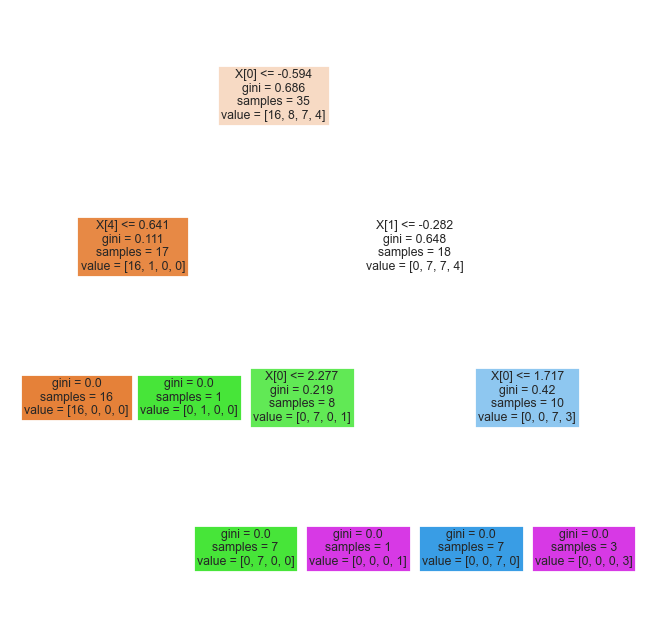

In [89]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf_en,  filled=True  )

# ARBRE DE DECISION en utilisant l'entropy

[Text(253.63636363636365, 528.5, 'X[0] <= -0.594\nentropy = 1.825\nsamples = 35\nvalue = [16, 8, 7, 4]'),
 Text(112.72727272727273, 377.5, 'X[1] <= -1.865\nentropy = 0.323\nsamples = 17\nvalue = [16, 1, 0, 0]'),
 Text(56.36363636363637, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(169.0909090909091, 226.5, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0]'),
 Text(394.54545454545456, 377.5, 'X[1] <= -0.282\nentropy = 1.542\nsamples = 18\nvalue = [0, 7, 7, 4]'),
 Text(281.8181818181818, 226.5, 'X[2] <= -1.156\nentropy = 0.544\nsamples = 8\nvalue = [0, 7, 0, 1]'),
 Text(225.45454545454547, 75.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(338.1818181818182, 75.5, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(507.2727272727273, 226.5, 'X[0] <= 1.717\nentropy = 0.881\nsamples = 10\nvalue = [0, 0, 7, 3]'),
 Text(450.90909090909093, 75.5, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(563.6363636363636, 75.5, 'entropy = 0.0\nsamp

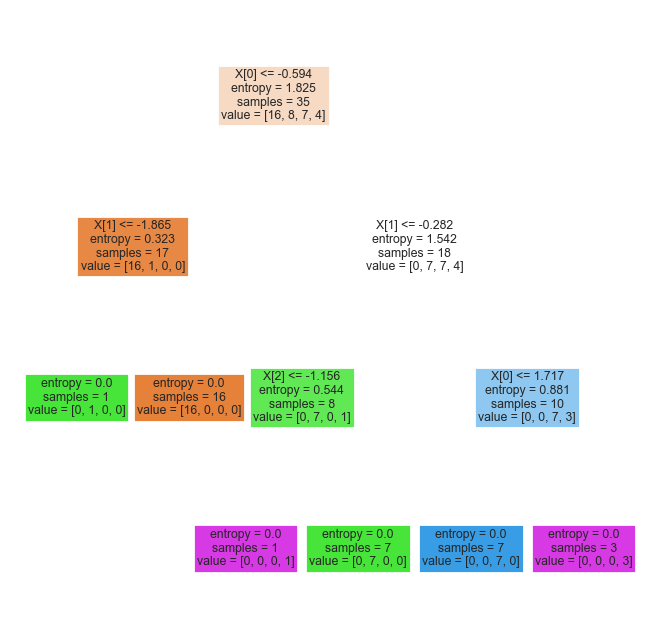

In [90]:
clf_en = DecisionTreeClassifier(criterion='entropy')
clf_en.fit(X_train,y_train)
y_pred = clf_en.predict(X_test)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf_en,  filled=True  )

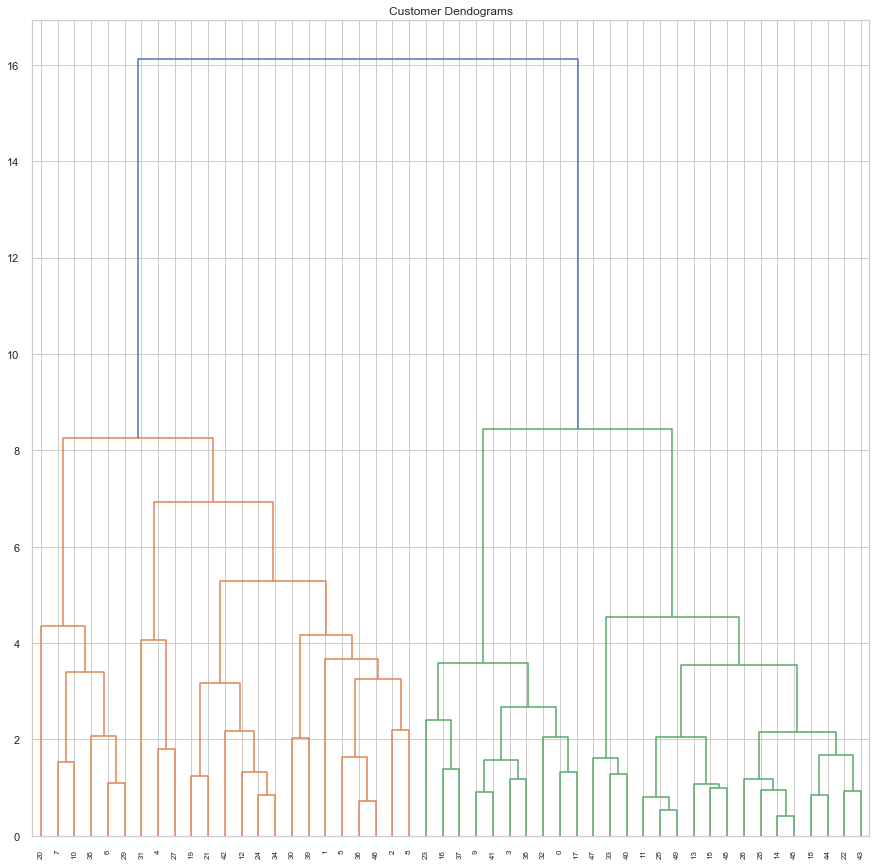

In [91]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 15))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))

In [92]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x_pca,labels=y_kmeans_pca, metric='euclidean')
print('Silhouette Score est en appliquant le kmeans avec 4 clusters : %.3f' % score)

Silhouette Score est en appliquant le kmeans avec 4 clusters : 0.276


For n_clusters = 2 The average silhouette_score is : 0.3206059508171855
For n_clusters = 4 The average silhouette_score is : 0.27839263076083165
For n_clusters = 6 The average silhouette_score is : 0.23812962776058644
For n_clusters = 8 The average silhouette_score is : 0.2314944339911519


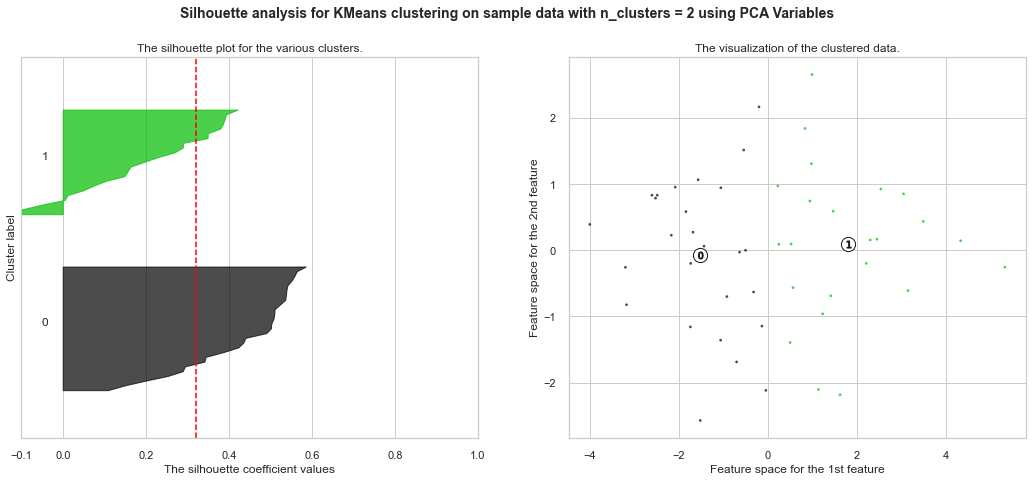

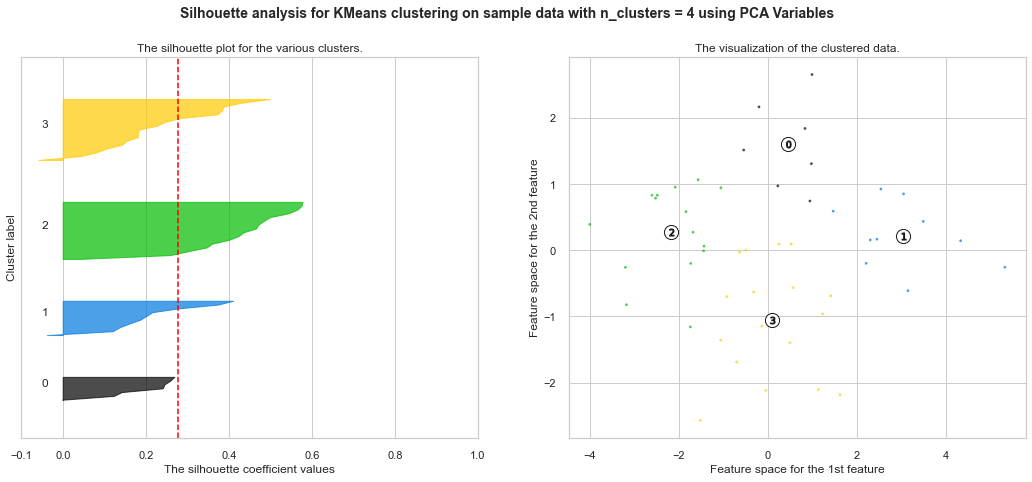

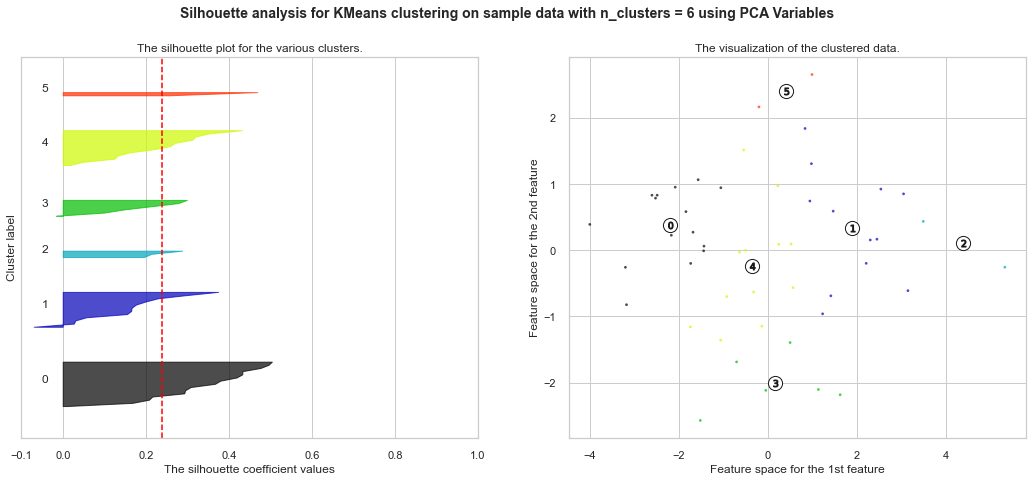

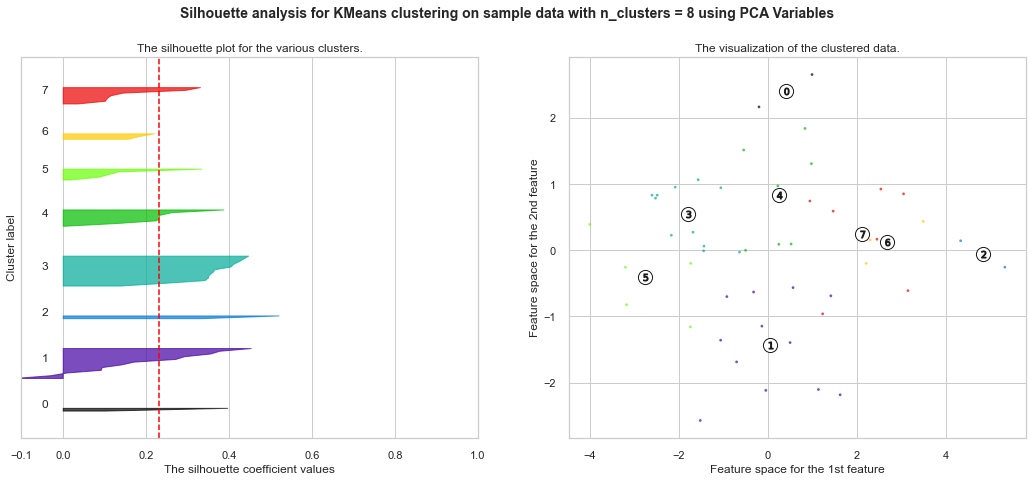

In [93]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2,4,6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_pca[:, 0], x_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d using PCA Variables"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()